# Deep Cell Spots

In [1]:
#gen package
import tifffile as tf
import numpy as np
import pandas as pd
#deep leaning spot detection
from deepcell_spots_detection import find_spots
#enhance figure display
%config InlineBackend.figure_format = 'retina'

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

def plot_2d_locs_on_2d_image(df_locs_2d_1, df_locs_2d_2, img_2d,add_trace = True, zmax=1000):
    
    #For Plotting 2d image
    #-------------------------------------------
    fig = px.imshow(
        img_2d,
        width=700,
        height=700,
        binary_string=True,
        binary_compression_level=4,
        binary_backend='pil',
        zmax = zmax
    )
    #-------------------------------------------
    
    #For Plotting 2d dots
    #-------------------------------------------
    fig.add_trace(go.Scattergl(
        x=df_locs_2d_1.x,
        y=df_locs_2d_1.y,
        mode='markers',
        marker_symbol='cross',
        marker=dict(
            #maxdisplayed=1000,
            size=4
            ),
        name = "Gaussian"
        )
    )
    if add_trace == True:
        fig.add_trace(go.Scattergl(
            x=df_locs_2d_2.x,
            y=df_locs_2d_2.y,
            mode='markers',
            marker_symbol='cross',
            marker=dict(
                #maxdisplayed=1000,
                size=4
                ),
            name = "LoG"
            )
        )
    #-------------------------------------------
    
    fig.show()
    
def plot_3d_locs_on_2d_image(df_tiff_1, df_tiff_2, tiff, channel, 
                             raw_src = None, raw_image = False, add_trace = True, zmax=10):
    
    if raw_image == False:

        #PLot All Z's that had dot detection
        #-------------------------------------------
        for z in range(len(tiff[:,channel])):
            if add_trace == False:
                df_locs_2d_1 = df_tiff_1[(df_tiff_1.z > z-1) & (df_tiff_1.z < z+1)]
                plot_2d_locs_on_2d_image(df_locs_2d_1, None, tiff[z, channel], zmax=zmax, add_trace=add_trace)
            else:
                df_locs_2d_1 = df_tiff_1[(df_tiff_1.z > z-1) & (df_tiff_1.z < z+1)]
                df_locs_2d_2= df_tiff_2[(df_tiff_2.z > z-1) & (df_tiff_2.z < z+1)]
                plot_2d_locs_on_2d_image(df_locs_2d_1,df_locs_2d_2, tiff[z, channel],add_trace=add_trace, zmax=zmax)
    else:
        #read raw image
        tiff = tf.imread(raw_src)
        if len(tiff.shape)==3:
            tiff=tiff.reshape(1,tiff.shape[0],tiff.shape[1],tiff.shape[2])
        #plot
        for z in range(len(tiff[:,channel])):
            if add_trace == False:
                df_locs_2d_1 = df_tiff_1[(df_tiff_1.z > z-1) & (df_tiff_1.z < z+1)]
                plot_2d_locs_on_2d_image(df_locs_2d_1,None, tiff[z, channel], zmax=zmax, add_trace=add_trace)
            else:
                df_locs_2d_1 = df_tiff_1[(df_tiff_1.z > z-1) & (df_tiff_1.z < z+1)]
                df_locs_2d_2= df_tiff_2[(df_tiff_2.z > z-1) & (df_tiff_2.z < z+1)]
                plot_2d_locs_on_2d_image(df_locs_2d_1,df_locs_2d_2, tiff[z, channel],add_trace=add_trace, zmax=zmax)

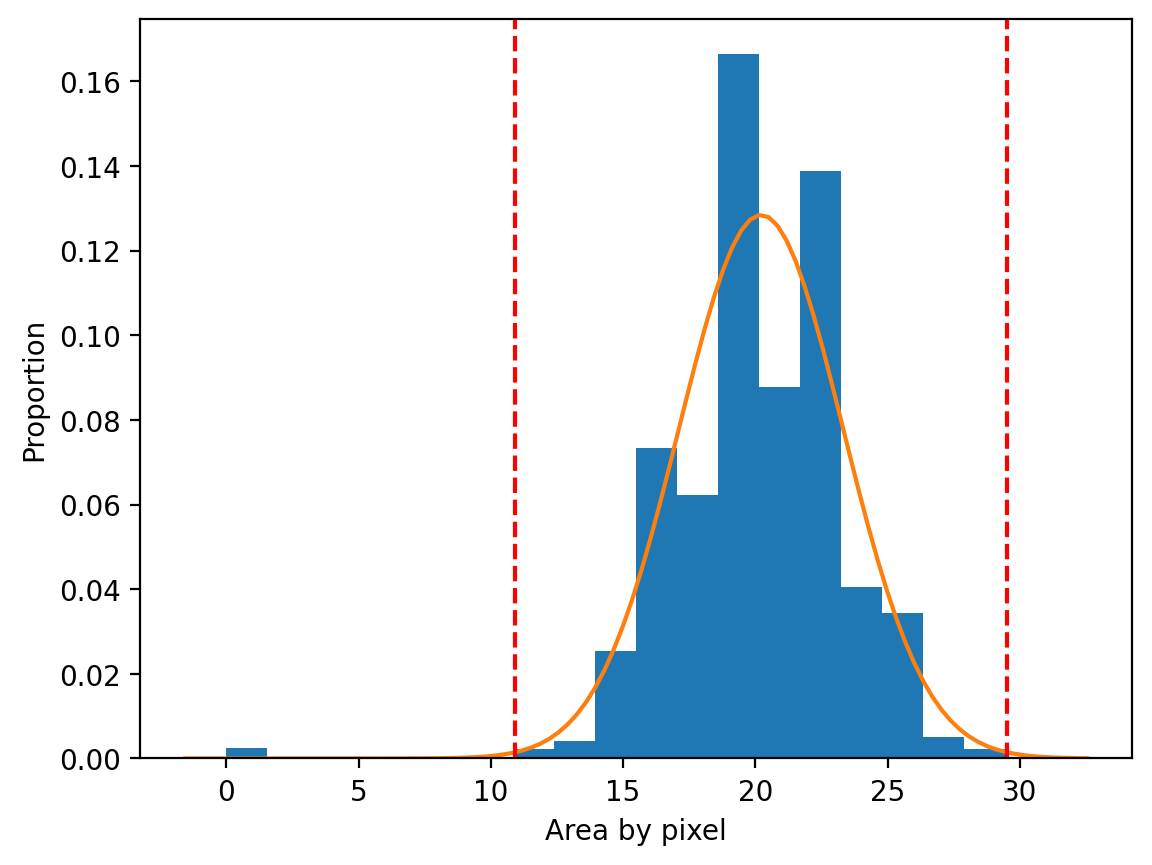

This task took 10.606777461369832 minutes


In [3]:
import time
#start time
start = time.time()

#image sources
img_src = "/groups/CaiLab/personal/Lex/raw/020422_20kdash_3t3/notebook_pyfiles/pre_processed_images/HybCycle_0/MMStack_Pos0.ome.tif"
img_raw = '/groups/CaiLab/personal/Lex/raw/020422_20kdash_3t3/notebook_pyfiles/aberration_corrected/HybCycle_0/MMStack_Pos0.ome.tif'

dots,pos = find_spots(img_raw, probability_threshold = 0.9, size_cutoff=3, pos=0)

print(f"This task took {(time.time() - start)/60} minutes")

In [5]:
pos

0

In [9]:
dots_ch = dots[dots["ch"]==1]


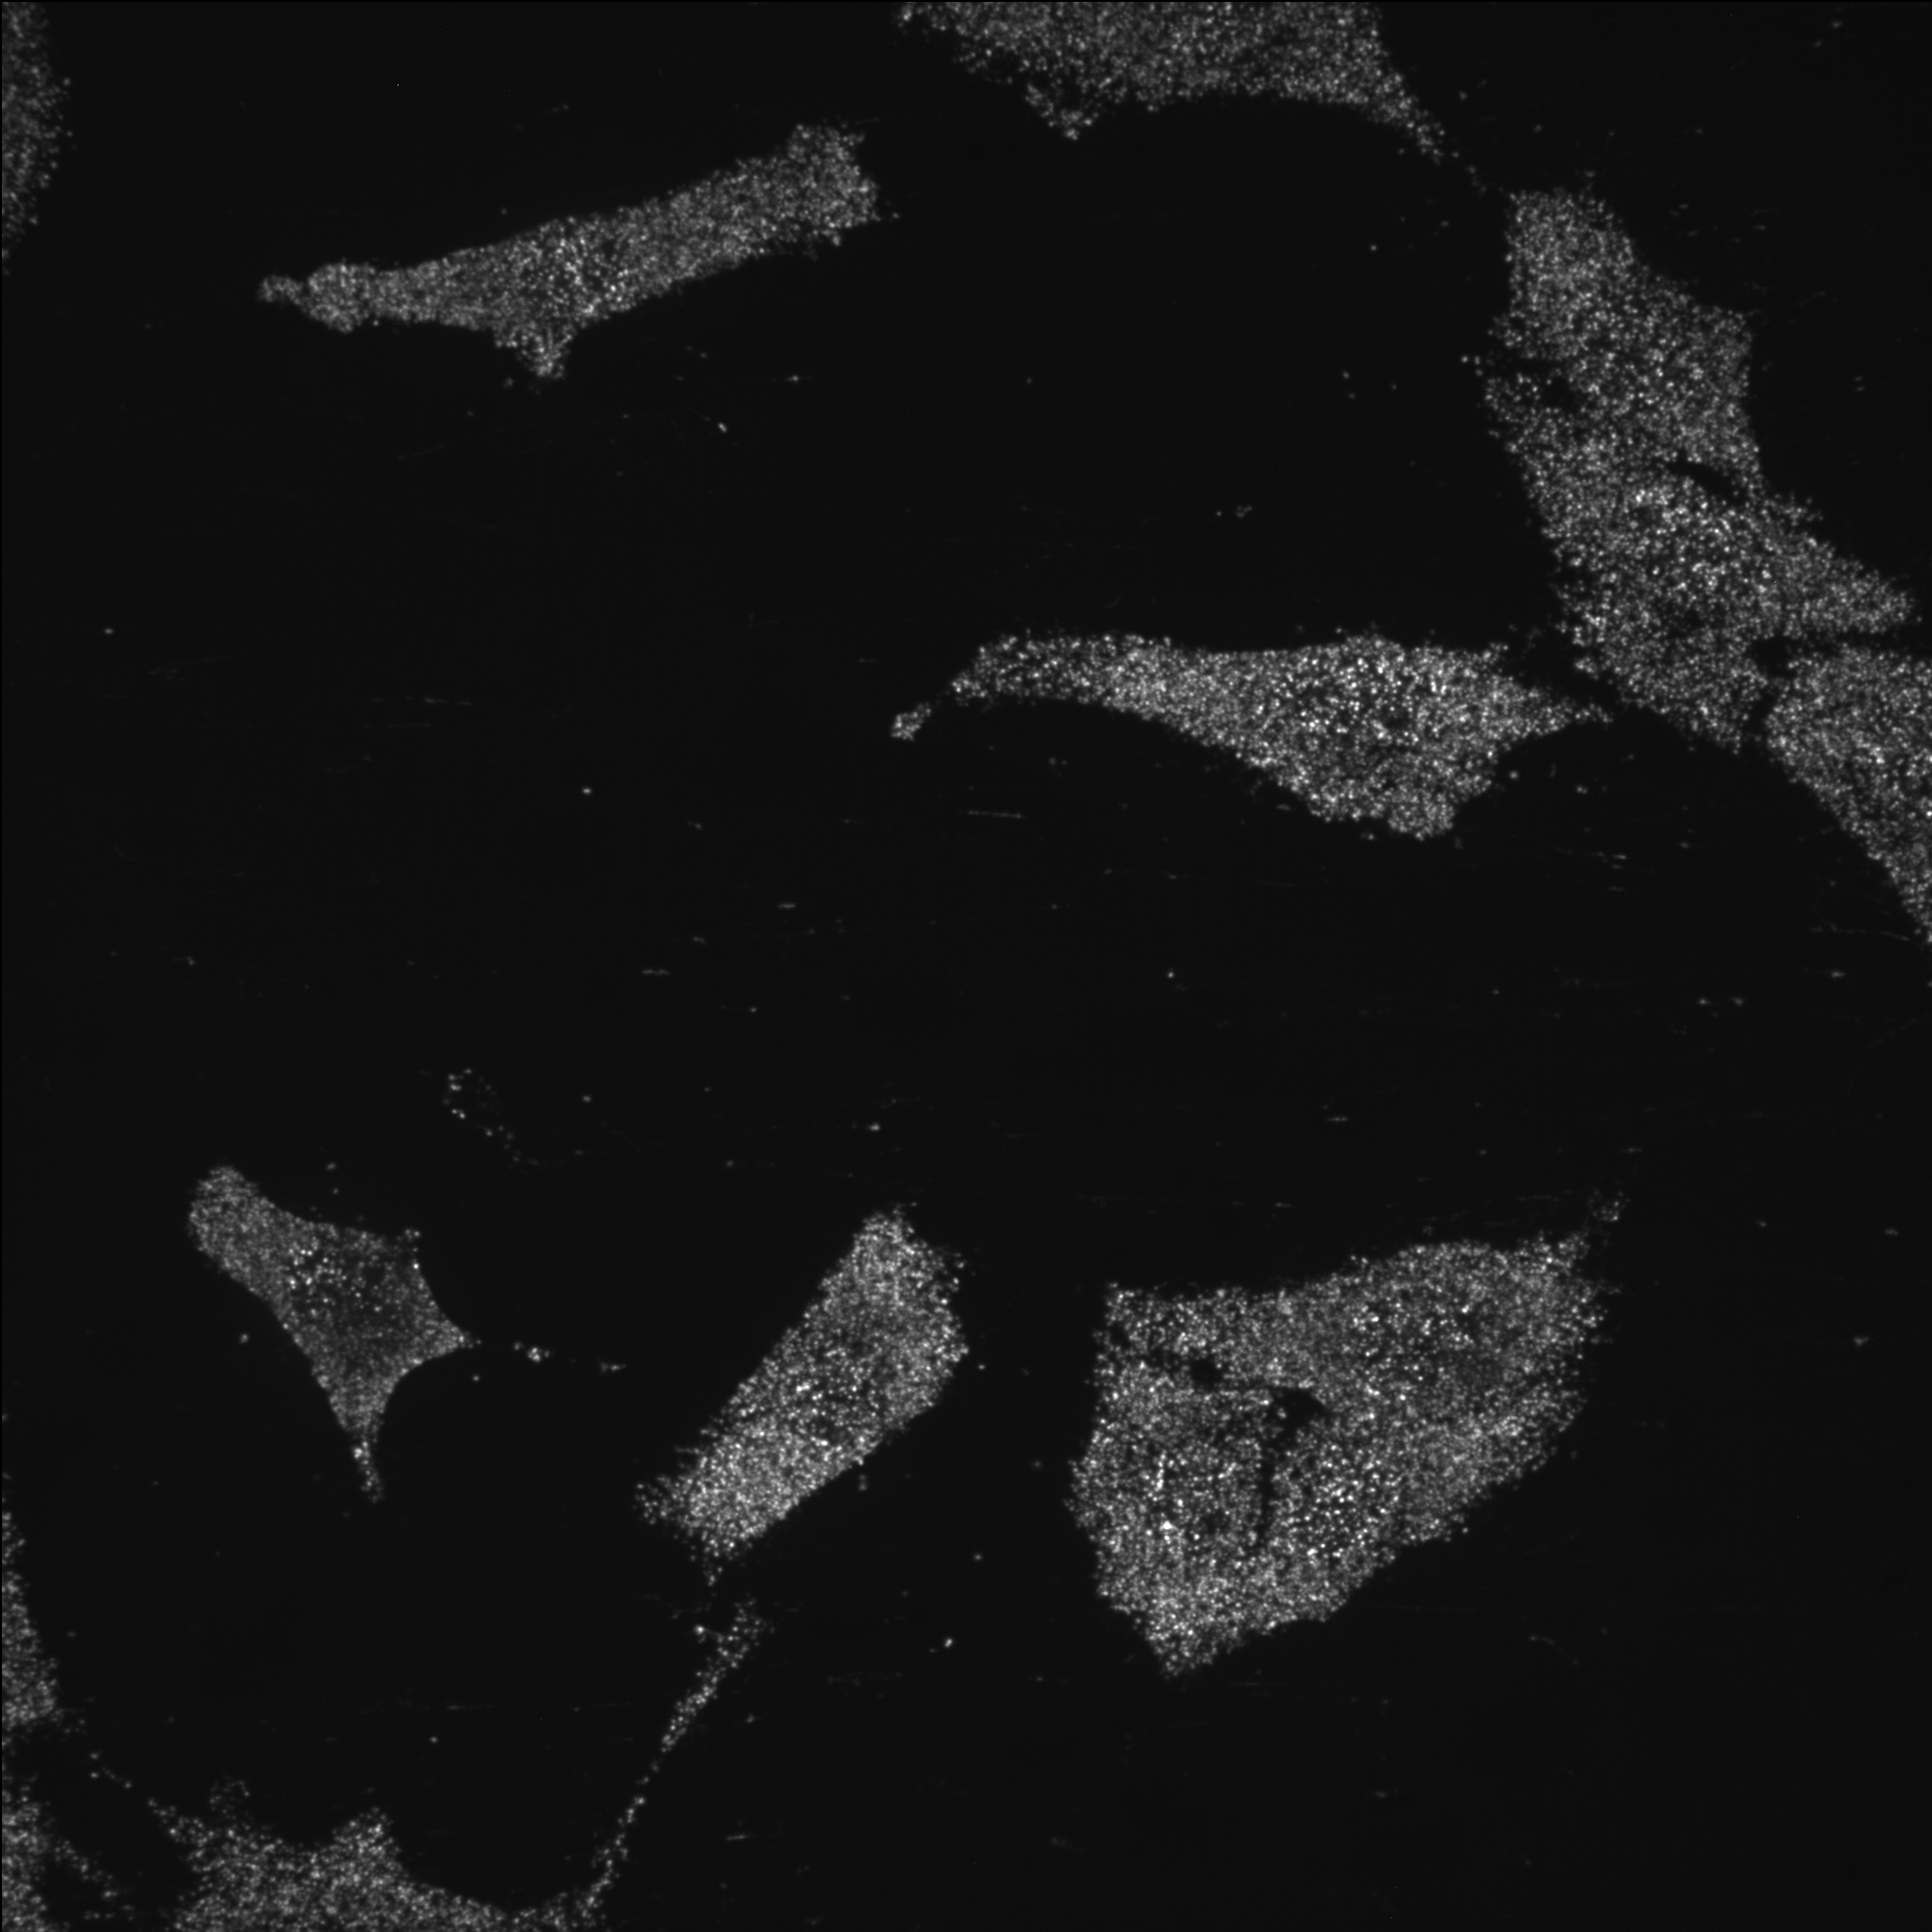

In [10]:
img_raw = '/groups/CaiLab/personal/Lex/raw/020422_20kdash_3t3/notebook_pyfiles/aberration_corrected/HybCycle_0/MMStack_Pos0.ome.tif'
plot_3d_locs_on_2d_image(dots_ch,None, tiff=None, channel=0, raw_src = img_raw, 
                         raw_image = True, add_trace=False, zmax=3000)

In [ ]:
tiff = tf.imread(img_src)
plot_3d_locs_on_2d_image(dots,None, tiff=tiff, channel=0, 
                         raw_src = img_raw, raw_image = False,add_trace=False, zmax=1000)

# Check if there are weird dropouts in a certain hyb for each threshold

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#collect arrays
channel = 4
comb_dots_list = []
for i in range(11):
    path = f"/groups/CaiLab/personal/Lex/raw/112221_20kdash_3t3/notebook_pyfiles/dots_comb/Channel_{channel}/MMStack_Pos1/Threshold_{i}/Dot_Locations/locations_z_0.csv"
    arr1  = pd.read_csv(path)
    comb_dots_list.append(arr1)

In [ ]:
#counts total number of dots across hybs
final_counts = []
for df in comb_dots_list:
    dots_per_hyb = []
    for i in df["hyb"].unique():
        dots_per_hyb.append(len(df[df["hyb"]==i]))
    final_counts.append(dots_per_hyb)

In [ ]:
#generate subplot canvas
x = 4
fig, ax = plt.subplots(x, x, figsize=(8,10), sharex = True, constrained_layout=True)
fig.text(0.5, 0.2, 'HybCycles', ha='center')
fig.text(-0.03, 0.6, 'Total Counts', va='center', rotation='vertical')
i = 0

#fill subplots
for row in ax:
    for col in row:
        try:
            #generate scatter plot of gene
            col.bar(x=np.arange(1,len(final_counts[i])+1,1) ,height=final_counts[i])
            sns.despine()
            col.set_title(f"Threshold {i}")
        except IndexError:
            col.remove()
        i += 1
plt.show()